In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [13]:
df = pd.read_csv('data/baseball_hw.csv', index_col=0)
df

,height,weight
0,1.8796,81.646560
1,1.8796,97.522280
2,1.8288,95.254320
3,1.8288,95.254320
4,1.8542,85.275296
...,...,...
1010,1.8542,86.182480
1011,1.8796,81.646560
1012,1.9050,92.986360
1013,1.9050,86.182480


In [5]:
df.describe()

,height,weight
count,1015.000000,1015.000000
mean,1.871717,91.330191
std,0.058774,9.445198
min,1.701800,68.038800
25%,1.828800,84.368112
50%,1.879600,90.718400
75%,1.905000,97.522280
max,2.108200,131.541680


In [7]:
# Write function to plot multiple variable to see distribution, outlier
def plot_dist_box(df, numeric_predictors=df.columns):
    n = len(numeric_predictors)
    plt.figure(figsize=(n*8, 2*6))
    k = 1
    for i in range(n):
        plt.subplot(2,n,k)
        sb.distplot(df[numeric_predictors[i]])
        plt.title('skew ratio: {:.2f}'.format(df[numeric_predictors[i]].skew()))
        k += 1
    
    for j in range(n):
        plt.subplot(2,n,k)
        sb.boxplot(y=df[numeric_predictors[j]])
        k += 1

    plt.show()

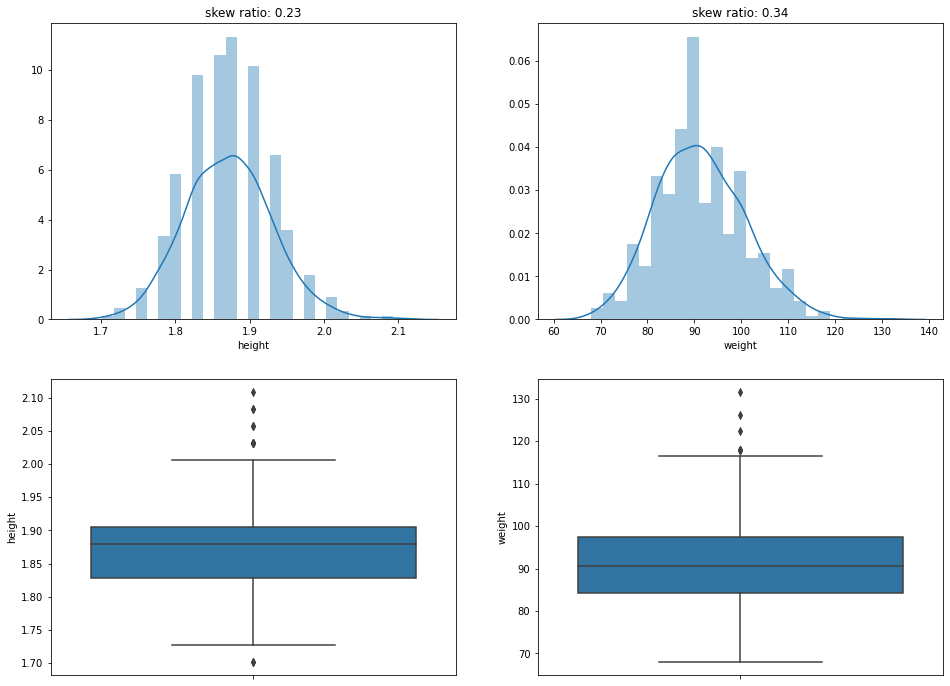

In [8]:
plot_dist_box(df)

In [9]:
def scaler_data(df, predictors=df.columns, method='StandardScaler'):
    
    if method == 'MinMaxScaler':
        scaler = MinMaxScaler()
    elif method == 'RobustScaler':
        scaler = RobustScaler()
    else:
        scaler = StandardScaler()
    
    df[predictors] = scaler.fit_transform(df[predictors])

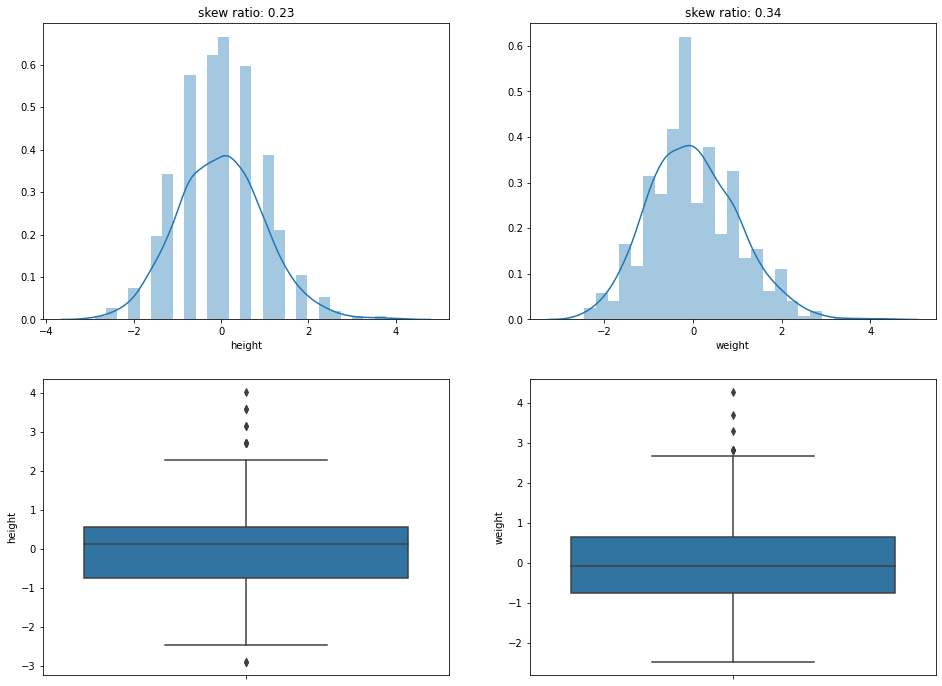

In [20]:
df_new = df.copy()
scaler_data(df_new)
plot_dist_box(df_new)

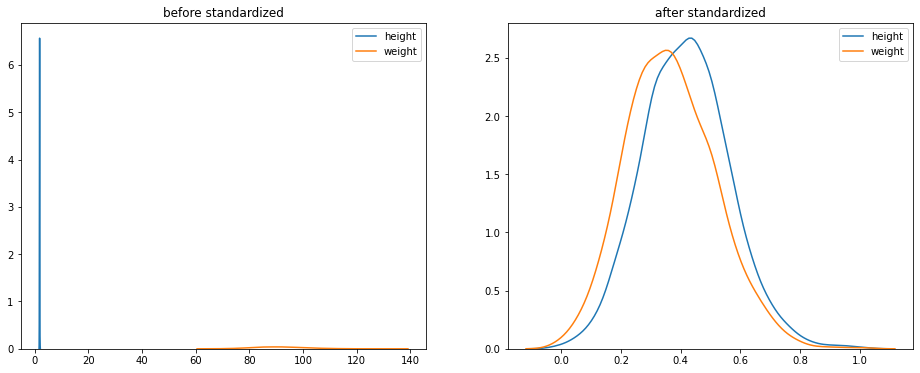

In [19]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
for i in df.columns:
    sb.kdeplot(df[i])
plt.title('before standardized')
plt.subplot(1,2,2)
for i in df_new.columns:
    sb.kdeplot(df_new[i])
plt.title('after standardized')
plt.show()